In [1]:
import pandas as pd
import numpy as np
import json
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
# df_g = pd.read_csv('clean_genres.csv',  index_col=0)
# df_g.columns = ['book_id','genre']
# df_g

In [3]:
# with open("goodreads_book_genres_initial.json") as f:
#     genre = json.load(f)

book_genre = [json.loads(line) for line in open('goodreads_book_genres_initial.json', 'r')]

In [4]:
book_genre = pd.DataFrame(book_genre)
book_genre['book_id'] = book_genre['book_id'].astype(int)
book_genre

,book_id,genres
0,5333265,"{'history, historical fiction, biography': 1}"
1,1333909,"{'fiction': 219, 'history, historical fiction,..."
2,7327624,"{'fantasy, paranormal': 31, 'fiction': 8, 'mys..."
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri..."
4,287140,{'non-fiction': 3}
...,...,...
2360650,3084038,"{'non-fiction': 5, 'history, historical fictio..."
2360651,26168430,"{'mystery, thriller, crime': 4, 'children': 1,..."
2360652,2342551,"{'poetry': 14, 'children': 7, 'young-adult': 1..."
2360653,22017381,"{'romance': 13, 'mystery, thriller, crime': 2}"


In [5]:
item_vec = pd.read_csv('item1.csv', index_col=0)
item_vec.columns = ['book_id','latent']
item_matrix = np.zeros([item_vec.shape[0], len(item_vec['latent'][1][1:-1].split(','))])
for i, latent in enumerate(item_vec['latent']):
    lat = latent[1:-1].split(',')
    lat = [float(i) for i in lat]
    item_matrix[i] = lat
    
user_vec = pd.read_csv('user1.csv', index_col=0 )
user_vec.columns = ['user_id', 'latent']
user_matrix = np.zeros([user_vec.shape[0], len(user_vec['latent'][1][1:-1].split(','))])
for i, latent in enumerate(user_vec['latent']):
    lat = latent[1:-1].split(',')
    lat = [float(i) for i in lat]
    user_matrix[i] = lat  

In [6]:
item_matrix = pd.DataFrame(item_matrix)
item_matrix['book_id'] = item_vec['book_id']
item_matrix

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,book_id
0,0.580035,0.703727,0.761646,0.518991,0.563482,0.712921,0.180149,0.121845,0.342858,1.002954,...,0.061431,0.234784,1.269727,0.190170,0.149070,0.441040,0.698156,0.194409,0.558919,10
1,0.449324,0.072643,0.145007,0.058899,0.430531,0.397394,0.686976,0.000000,0.234549,0.164073,...,0.192636,0.025156,0.312468,0.012271,0.000000,0.127291,0.000000,0.611779,0.029285,30
2,1.118462,0.551938,0.000000,0.000000,0.000000,0.059511,0.018728,0.000000,0.000000,0.000000,...,0.000000,0.701013,0.079224,0.000000,0.092174,0.314599,0.000000,0.000000,0.187382,60
3,0.778145,0.945211,0.541833,0.602789,0.387100,0.686747,0.814866,0.493613,0.520855,0.467970,...,0.552249,0.330470,0.698750,0.319142,0.907971,1.069460,0.636484,0.460992,0.416877,80
4,0.111633,0.320445,0.000000,0.000000,0.405505,0.000000,0.229493,0.000000,0.000000,0.000000,...,0.000000,0.473519,0.000000,0.128031,0.000000,0.036044,0.160889,0.000000,0.000000,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96160,0.376296,0.336084,0.000000,0.295679,0.142737,0.015414,0.189330,0.247415,0.000000,0.000000,...,0.267409,0.000000,0.228253,0.006804,0.014104,0.352281,0.005379,0.082594,0.138240,2309509
96161,0.000000,0.000000,0.000000,0.238409,0.000000,0.000000,0.000000,0.123981,0.470235,0.000000,...,0.000000,0.000000,0.211292,0.229652,0.000000,0.180965,0.000000,0.459738,0.000000,2310989
96162,0.000000,0.011266,0.028182,0.000000,0.037561,0.068637,0.000000,0.000000,0.200506,0.024719,...,0.081619,0.074395,0.000000,0.000000,0.006901,0.000000,0.027757,0.045219,0.000481,2312949
96163,0.085079,0.233054,0.229391,0.511861,0.765620,0.204255,0.264570,0.021769,0.965586,0.083636,...,0.060457,1.122852,0.545355,0.024412,0.054641,0.086243,0.015297,0.039285,0.232469,2331439


In [7]:
user_matrix = pd.DataFrame(user_matrix)
user_matrix['user_id'] = user_vec['user_id']
user_matrix

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,user_id
0,0.066816,0.036915,0.006628,0.077969,0.018626,0.072593,0.010653,0.002081,0.023289,0.039247,...,0.007701,0.020928,0.008068,0.013852,0.054992,0.017584,0.029191,0.087279,0.035366,270
1,0.157679,0.047289,0.169664,0.086454,0.000000,0.017704,0.018777,0.001466,0.009148,0.000000,...,0.030388,0.147898,0.000000,0.005459,0.000000,0.001436,0.163148,0.007236,0.020077,310
2,0.144182,0.000000,0.000000,0.129774,0.106021,0.062599,0.018324,0.035214,0.001426,0.146410,...,0.157889,0.000000,0.000000,0.002015,0.017159,0.101572,0.122378,0.005429,0.000239,560
3,0.028377,0.033677,0.050527,0.117806,0.014131,0.000000,0.000000,0.034961,0.022520,0.011914,...,0.017440,0.044575,0.286582,0.064976,0.000528,0.000000,0.090884,0.112125,0.002296,780
4,0.120428,0.000910,0.025309,0.001827,0.025472,0.000040,0.115273,0.000000,0.040778,0.225325,...,0.013923,0.002592,0.015543,0.195054,0.100186,0.006296,0.004785,0.105821,0.000587,1460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,0.019113,0.000000,0.000000,0.150468,0.013045,0.048610,0.000000,0.000000,0.115660,0.000000,...,0.044356,0.010573,0.000846,0.038806,0.000000,0.175812,0.000000,0.018588,0.000000,441739
13192,0.000000,0.021051,0.000000,0.040529,0.061893,0.116363,0.000000,0.015922,0.010018,0.052886,...,0.050905,0.025206,0.051662,0.191690,0.018371,0.007704,0.032245,0.037219,0.019138,441929
13193,0.000000,0.000000,0.016748,0.055120,0.019671,0.054376,0.033005,0.051622,0.027700,0.003687,...,0.001172,0.000000,0.027105,0.002134,0.043733,0.023113,0.000000,0.006237,0.000000,442039
13194,0.000000,0.043169,0.000000,0.107709,0.000000,0.000000,0.132378,0.019809,0.000000,0.109227,...,0.122424,0.234962,0.000000,0.003982,0.000000,0.109025,0.000000,0.000000,0.069961,442199


In [8]:
train = pd.read_csv('data/train1.csv', index_col = 0)
train.columns = ['user','book_id','is_read','rating','is_reviewed']
book_rating_dic = {i:[] for i in train.book_id.unique()}

for i, book in enumerate(train['book_id']):
    book_rating_dic[book] += [train['rating'][i]]
    
for key in book_rating_dic:
    book_rating_dic[key] = sum(book_rating_dic[key]) / len(book_rating_dic[key])
    
book_id = np.copy(item_matrix['book_id'])
item_matrix['avg_rating'] = book_id
avg_rat = item_matrix['avg_rating'].map(book_rating_dic)
item_matrix['avg_rating'] = avg_rat

In [9]:
import math
item_matrix['ceiling_rate'] = item_matrix['avg_rating'].map(math.ceil)
item_matrix

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,book_id,avg_rating,ceiling_rate
0,0.580035,0.703727,0.761646,0.518991,0.563482,0.712921,0.180149,0.121845,0.342858,1.002954,...,1.269727,0.190170,0.149070,0.441040,0.698156,0.194409,0.558919,10,4.833333,5
1,0.449324,0.072643,0.145007,0.058899,0.430531,0.397394,0.686976,0.000000,0.234549,0.164073,...,0.312468,0.012271,0.000000,0.127291,0.000000,0.611779,0.029285,30,3.000000,3
2,1.118462,0.551938,0.000000,0.000000,0.000000,0.059511,0.018728,0.000000,0.000000,0.000000,...,0.079224,0.000000,0.092174,0.314599,0.000000,0.000000,0.187382,60,5.000000,5
3,0.778145,0.945211,0.541833,0.602789,0.387100,0.686747,0.814866,0.493613,0.520855,0.467970,...,0.698750,0.319142,0.907971,1.069460,0.636484,0.460992,0.416877,80,4.466667,5
4,0.111633,0.320445,0.000000,0.000000,0.405505,0.000000,0.229493,0.000000,0.000000,0.000000,...,0.000000,0.128031,0.000000,0.036044,0.160889,0.000000,0.000000,90,3.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96160,0.376296,0.336084,0.000000,0.295679,0.142737,0.015414,0.189330,0.247415,0.000000,0.000000,...,0.228253,0.006804,0.014104,0.352281,0.005379,0.082594,0.138240,2309509,2.000000,2
96161,0.000000,0.000000,0.000000,0.238409,0.000000,0.000000,0.000000,0.123981,0.470235,0.000000,...,0.211292,0.229652,0.000000,0.180965,0.000000,0.459738,0.000000,2310989,4.000000,4
96162,0.000000,0.011266,0.028182,0.000000,0.037561,0.068637,0.000000,0.000000,0.200506,0.024719,...,0.000000,0.000000,0.006901,0.000000,0.027757,0.045219,0.000481,2312949,3.000000,3
96163,0.085079,0.233054,0.229391,0.511861,0.765620,0.204255,0.264570,0.021769,0.965586,0.083636,...,0.545355,0.024412,0.054641,0.086243,0.015297,0.039285,0.232469,2331439,4.000000,4


# ITEM

# PCA 

In [10]:
pca = PCA(n_components=10)
feat_cols = np.arange(160)
pca_result = pca.fit_transform(item_matrix[feat_cols].values)
item_matrix['pca-one'] = pca_result[:,0]
item_matrix['pca-two'] = pca_result[:,1] 
item_matrix['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.12403311 0.00963842 0.00735881 0.00724233 0.00717014 0.00712925
 0.00704764 0.00694063 0.00690705 0.00683868]


Text(0.5, 1.0, '2D Ceiling Ratings on Books')

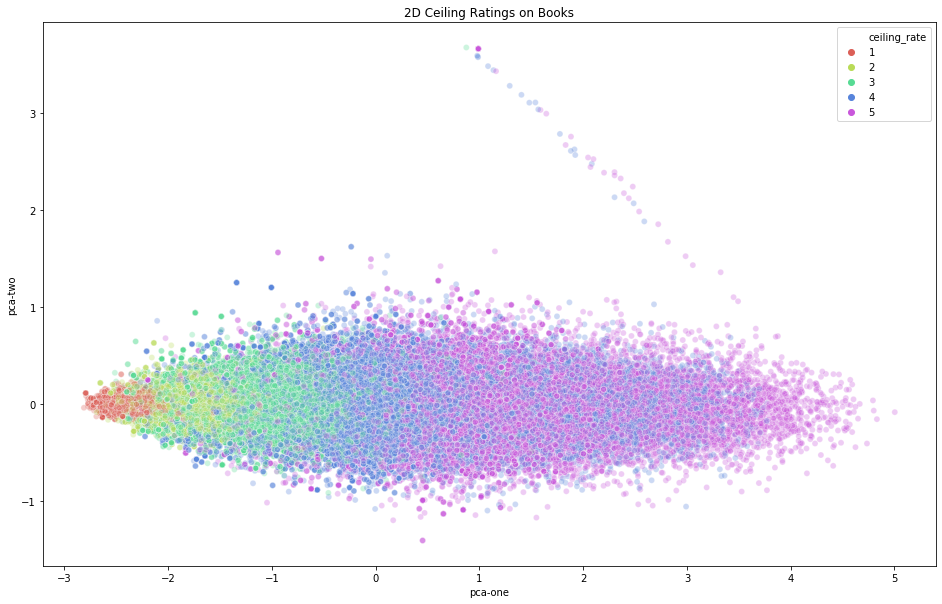

In [15]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue = 'ceiling_rate',
    palette = sns.color_palette("hls", 5),
    data = item_matrix,
    legend = "full",
    alpha = 0.3
)
plt.title('2D Ceiling Ratings on Books')

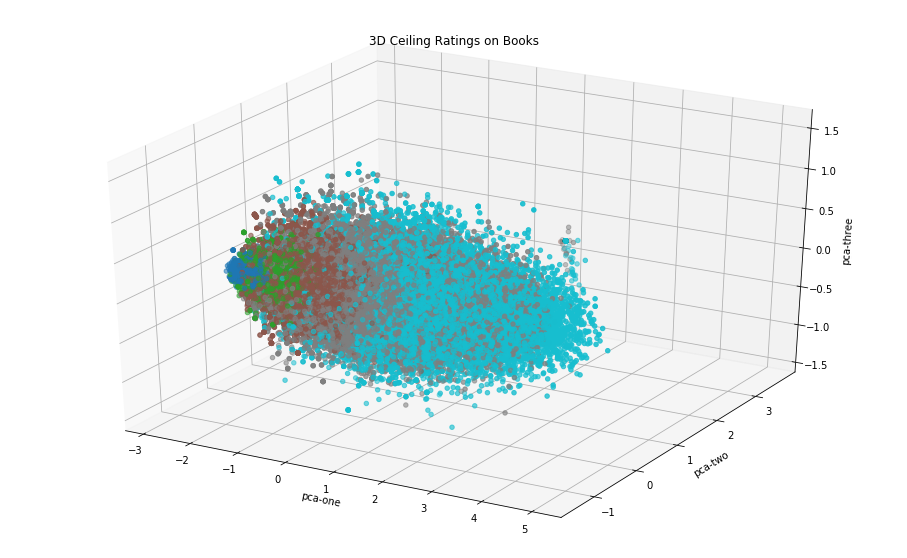

In [16]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=item_matrix["pca-one"], 
    ys=item_matrix["pca-two"], 
    zs=item_matrix["pca-three"], 
    c=item_matrix["ceiling_rate"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.title('3D Ceiling Ratings on Books')
plt.show()

# T-SNE

In [32]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(item_matrix[feat_cols].values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 96165 samples in 3.787s...
[t-SNE] Computed neighbors for 96165 samples in 3555.171s...
[t-SNE] Computed conditional probabilities for sample 1000 / 96165
[t-SNE] Computed conditional probabilities for sample 2000 / 96165
[t-SNE] Computed conditional probabilities for sample 3000 / 96165
[t-SNE] Computed conditional probabilities for sample 4000 / 96165
[t-SNE] Computed conditional probabilities for sample 5000 / 96165
[t-SNE] Computed conditional probabilities for sample 6000 / 96165
[t-SNE] Computed conditional probabilities for sample 7000 / 96165
[t-SNE] Computed conditional probabilities for sample 8000 / 96165
[t-SNE] Computed conditional probabilities for sample 9000 / 96165
[t-SNE] Computed conditional probabilities for sample 10000 / 96165
[t-SNE] Computed conditional probabilities for sample 11000 / 96165
[t-SNE] Computed conditional probabilities for sample 12000 / 96165
[t-SNE] Computed conditional probabilities for

Text(0.5, 1.0, 't-SNE of ceiling rating on books')

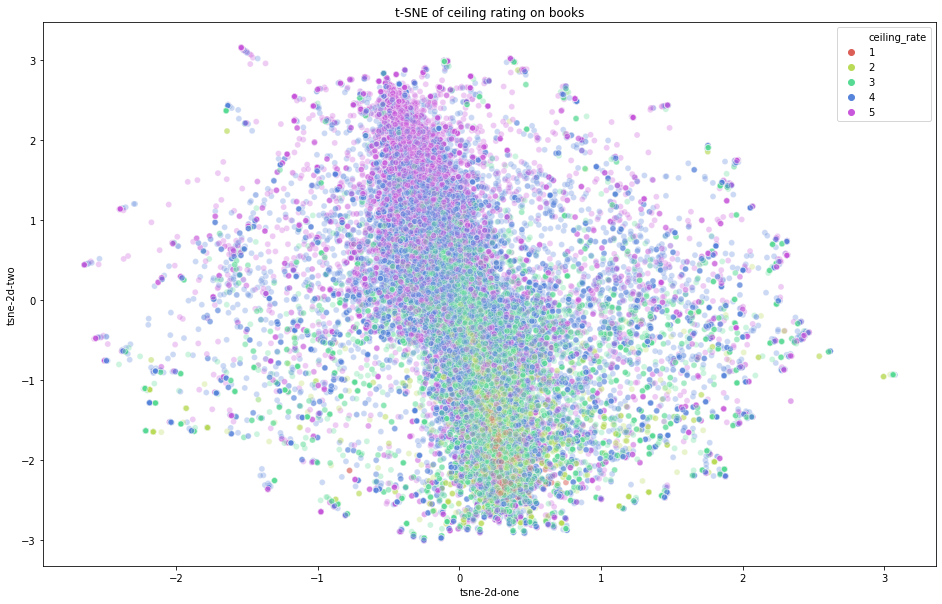

In [33]:
item_matrix['tsne-2d-one'] = tsne_results[:,0]
item_matrix['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="ceiling_rate",
    palette=sns.color_palette("hls", 5),
    data=item_matrix,
    legend="full",
    alpha=0.3
)
plt.title('t-SNE of ceiling rating on books')

# USER

In [19]:
user_rating_dic = dict(train.groupby('user')['rating'].mean())
user_id = np.copy(user_matrix['user_id'])
user_matrix['avg_rating'] = user_id
avg_rat = user_matrix['avg_rating'].map(user_rating_dic)
user_matrix['avg_rating'] = avg_rat

In [20]:
user_matrix['ceiling_rate'] = user_matrix['avg_rating'].map(math.ceil)
user_matrix

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,user_id,avg_rating,ceiling_rate
0,0.066816,0.036915,0.006628,0.077969,0.018626,0.072593,0.010653,0.002081,0.023289,0.039247,...,0.008068,0.013852,0.054992,0.017584,0.029191,0.087279,0.035366,270,4.000000,4
1,0.157679,0.047289,0.169664,0.086454,0.000000,0.017704,0.018777,0.001466,0.009148,0.000000,...,0.000000,0.005459,0.000000,0.001436,0.163148,0.007236,0.020077,310,3.600000,4
2,0.144182,0.000000,0.000000,0.129774,0.106021,0.062599,0.018324,0.035214,0.001426,0.146410,...,0.000000,0.002015,0.017159,0.101572,0.122378,0.005429,0.000239,560,3.714286,4
3,0.028377,0.033677,0.050527,0.117806,0.014131,0.000000,0.000000,0.034961,0.022520,0.011914,...,0.286582,0.064976,0.000528,0.000000,0.090884,0.112125,0.002296,780,3.666667,4
4,0.120428,0.000910,0.025309,0.001827,0.025472,0.000040,0.115273,0.000000,0.040778,0.225325,...,0.015543,0.195054,0.100186,0.006296,0.004785,0.105821,0.000587,1460,4.090909,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,0.019113,0.000000,0.000000,0.150468,0.013045,0.048610,0.000000,0.000000,0.115660,0.000000,...,0.000846,0.038806,0.000000,0.175812,0.000000,0.018588,0.000000,441739,3.631579,4
13192,0.000000,0.021051,0.000000,0.040529,0.061893,0.116363,0.000000,0.015922,0.010018,0.052886,...,0.051662,0.191690,0.018371,0.007704,0.032245,0.037219,0.019138,441929,4.250000,5
13193,0.000000,0.000000,0.016748,0.055120,0.019671,0.054376,0.033005,0.051622,0.027700,0.003687,...,0.027105,0.002134,0.043733,0.023113,0.000000,0.006237,0.000000,442039,2.900000,3
13194,0.000000,0.043169,0.000000,0.107709,0.000000,0.000000,0.132378,0.019809,0.000000,0.109227,...,0.000000,0.003982,0.000000,0.109025,0.000000,0.000000,0.069961,442199,3.846154,4


# PCA

In [21]:
pca = PCA(n_components=10)
feat_cols = np.arange(160)
pca_result = pca.fit_transform(user_matrix[feat_cols].values)
user_matrix['pca-one'] = pca_result[:,0]
user_matrix['pca-two'] = pca_result[:,1] 
user_matrix['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.01192817 0.00858733 0.00844686 0.00835714 0.00824628 0.00808906
 0.00804469 0.00792072 0.00782696 0.00774888]


Text(0.5, 1.0, '2D Ceiling Ratings on Users')

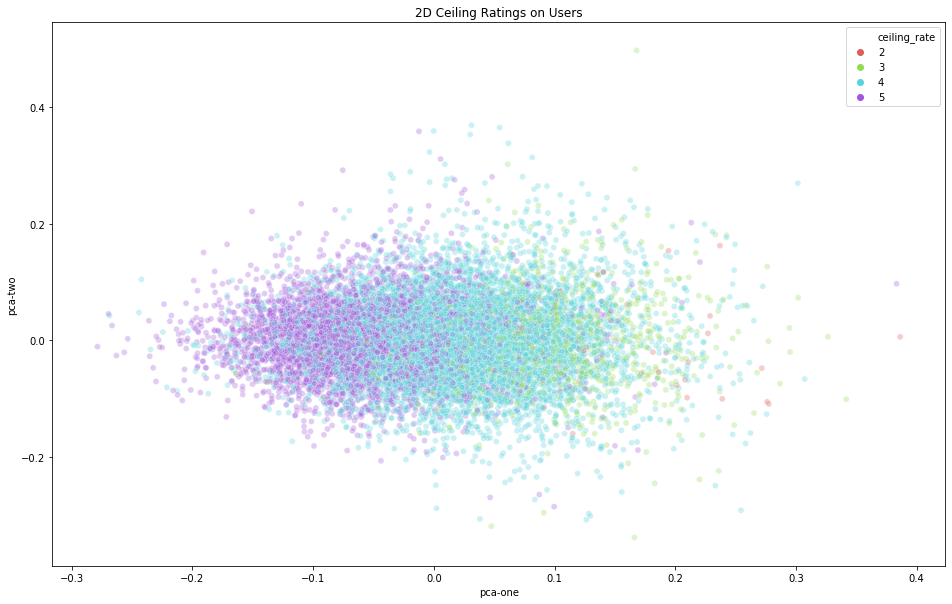

In [22]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue = 'ceiling_rate',
    palette = sns.color_palette("hls", 4),
    data = user_matrix,
    legend = "full",
    alpha = 0.3
)
plt.title('2D Ceiling Ratings on Users')

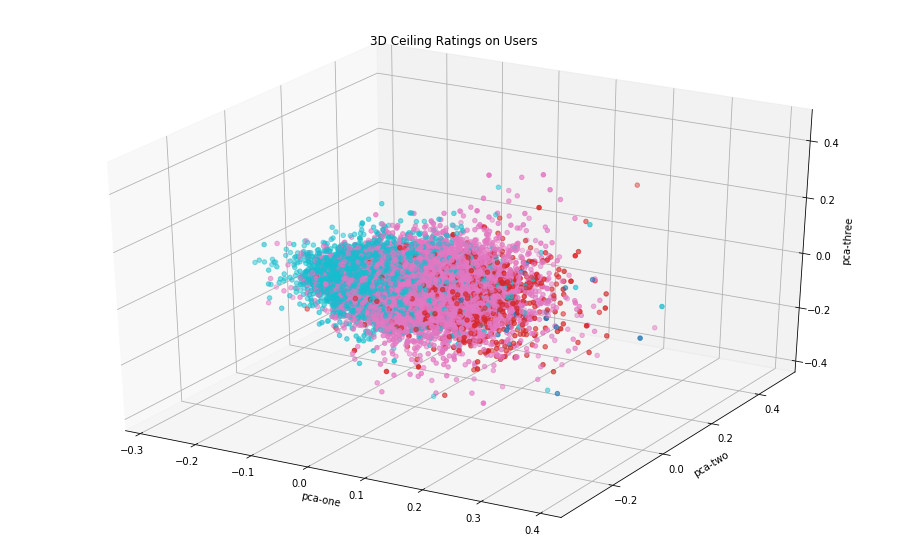

In [23]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=user_matrix["pca-one"], 
    ys=user_matrix["pca-two"], 
    zs=user_matrix["pca-three"], 
    c=user_matrix["ceiling_rate"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.title('3D Ceiling Ratings on Users')
plt.show()

# t-SNE

In [28]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(user_matrix[feat_cols].values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 13196 samples in 0.190s...
[t-SNE] Computed neighbors for 13196 samples in 60.346s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13196
[t-SNE] Computed conditional probabilities for sample 2000 / 13196
[t-SNE] Computed conditional probabilities for sample 3000 / 13196
[t-SNE] Computed conditional probabilities for sample 4000 / 13196
[t-SNE] Computed conditional probabilities for sample 5000 / 13196
[t-SNE] Computed conditional probabilities for sample 6000 / 13196
[t-SNE] Computed conditional probabilities for sample 7000 / 13196
[t-SNE] Computed conditional probabilities for sample 8000 / 13196
[t-SNE] Computed conditional probabilities for sample 9000 / 13196
[t-SNE] Computed conditional probabilities for sample 10000 / 13196
[t-SNE] Computed conditional probabilities for sample 11000 / 13196
[t-SNE] Computed conditional probabilities for sample 12000 / 13196
[t-SNE] Computed conditional probabilities for s

Text(0.5, 1.0, 't-SNE of ceiling rating on users')

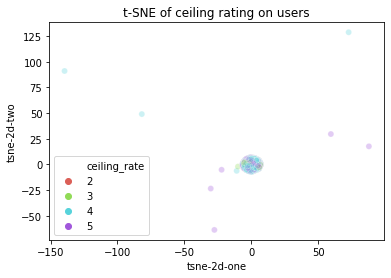

In [31]:
user_matrix['tsne-2d-one'] = tsne_results[:,0]
user_matrix['tsne-2d-two'] = tsne_results[:,1]
# plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="ceiling_rate",
    palette=sns.color_palette("hls", 4),
    data=user_matrix,
    legend="full",
    alpha=0.3
)
plt.title('t-SNE of ceiling rating on users')